**Food Vision** : A Component of the TensorFlow Developer Certificate Course

Course Link : [TensorFlow Developer Certificate](https://www.udemy.com/share/104ssS3@qr2xIEbG8LOqfGgHfmw-a2Z6r_d_6_olkS5hKSmVWT23wYDJNTbD82qAAoaJss-SKQ==/)

In [2]:
# #update tensorflow
# !pip install --upgrade tensorflow

# #verify
# import tensorflow as tf
# print(tf.__version__)

## Getting helper functions

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-31 16:12:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-31 16:12:23 (62.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Importing helper functions

In [61]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, load_and_prep_image

##Using Tensorflow Datasets

In [5]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [6]:
# List all available datasets
datasets_list = tfds.list_builders()# get all available datasets in TFDS
print("food101" in datasets_list)# is our target dataset in the list of TFDS datasets?

True


In [7]:
# Load in the dataset

(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                             with_info=True,#loads info about the dataset(metadata)
                                              )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteY886C4/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteY886C4/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 dataset
by finding the;
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names?


In [8]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [9]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:6]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad']

In [10]:
# Take one sample of the train data
train_one_sample = train_data.take(1)# samples are in format (image_tensor, label)

In [11]:
# What does one sample of the training data look like?
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
# Output info about our training sample
for image, label, in train_one_sample:
  print(f"""
  Image Shape: {image.shape}
  IMage Datatype: {image.dtype}
  Target Class(tensor form): {label}
  Class Name(string form): {class_names[label.numpy()]}
  """)


  Image Shape: (384, 512, 3)
  IMage Datatype: <dtype: 'uint8'>
  Target Class(tensor form): 70
  Class Name(string form): pad_thai
  


In [13]:
# What does the image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[230, 229, 183],
        [231, 230, 184],
        [232, 231, 183],
        ...,
        [232, 233, 202],
        [229, 234, 204],
        [229, 236, 205]],

       [[228, 227, 179],
        [227, 226, 178],
        [226, 226, 176],
        ...,
        [234, 235, 204],
        [232, 237, 207],
        [234, 241, 210]],

       [[229, 229, 175],
        [229, 229, 175],
        [227, 227, 175],
        ...,
        [233, 234, 202],
        [232, 237, 205],
        [235, 242, 209]],

       ...,

       [[119,  97,  58],
        [131, 109,  70],
        [131, 109,  70],
        ...,
        [239, 241, 220],
        [238, 240, 219],
        [238, 240, 219]],

       [[120,  98,  61],
        [133, 111,  74],
        [135, 113,  76],
        ...,
        [240, 242, 221],
        [240, 242, 221],
        [240, 242, 221]],

       [[136, 114,  77],
        [135, 113,  76],
        [129, 107,  70],
        ...,
        [243, 245, 22

 They're not normalized and the min and max value will be 0 and 255 respectively. Since we will be using EfficientnetB0, it has an inbuilt normalizing layer so we dont have to normalize the data.

In [14]:
#min and max values of the image tensor
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plotting an image

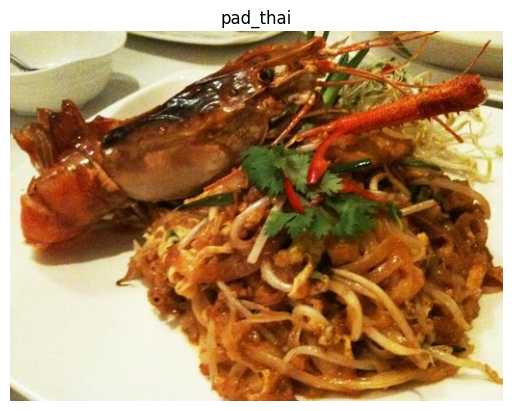

In [15]:
#plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## Create preprocessing functions

**we're going to be using an EfficientNet0X pretrained model from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in).**

the function needs to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors from `unit8` to `float32`

In [16]:
# data comes in the tuple structure: (image, label)

In [17]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  image to [img_shape, img_shape, colour_channels]
  """

  image= tf.image.resize(image, [img_shape, img_shape])
  # image = image/255. # scale image values (not required with EfficientNetBX models from tf.keras.applications)
  return tf.cast(image, tf.float32), label# return (float32_image, label) tuple

In [18]:
# Preprocess a single sample image and check the outputs
preprocessed_img= preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...., \nShape: {image.shape}, \nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...., \nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}\n")


Image before preprocessing:
 [[[230 229 183]
  [231 230 184]
  [232 231 183]
  ...
  [232 233 202]
  [229 234 204]
  [229 236 205]]

 [[228 227 179]
  [227 226 178]
  [226 226 176]
  ...
  [234 235 204]
  [232 237 207]
  [234 241 210]]]...., 
Shape: (384, 512, 3), 
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[229.46939 228.46939 181.7551 ]
  [229.59184 228.94897 180.2347 ]
  [224.14796 224.14796 171.71939]
  ...
  [238.21933 231.07143 200.37251]
  [237.02545 233.38266 204.23978]
  [230.32655 236.04091 205.68373]]

 [[228.80103 228.87245 174.58673]
  [225.95409 225.95918 173.80103]
  [226.64795 226.64795 174.21939]
  ...
  [238.41322 232.41322 199.95409]
  [235.8571  233.14287 202.07143]
  [233.04602 238.76038 206.4032 ]]]...., 
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>



## Batch and prepare datasets

In [19]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

creating callbacks to help us while our model trains:
* TensorBoard callback to log training results (so we can visualize them later if need be), can be imported from helper_functions
* ModelCheckpoint callback to save our model's progress after feature extraction

In [21]:
# Create tensorboard callback (import from helper_functions.py)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best=True,
                                                      save_weights=True,
                                                      )

## Setup mixed precision training


Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.


In [22]:
# Turn on mixed precision training
import tensorflow as tf
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

In [23]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model

In [24]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape=(224, 224, 3)
base_model= tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create functional model
inputs= layers.Input(shape=input_shape, name="input_layer")
# EfficientNetBX models have rescaling built-in but if your model doesn't you can have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x= base_model(inputs, training =False)
x= layers.GlobalAveragePooling2D()(x)
x= layers.Dense(len(class_names))(x)

outputs= layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model= tf.keras.Model(inputs,outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


16705208/16705208 [==============================] - 0s 0us/step


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

## Checking which layers use mixed precision

In [26]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [27]:
#further checking which induvidual layers in the base model(efficientnetB0) uses mixed precision
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

## Fit the feature extraction model

In [28]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                      epochs=3,
                                                      steps_per_epoch=(len(train_data)),
                                                      validation_data=test_data,
                                                      validation_steps=int(0.15* len(test_data)),
                                                      callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetB0_101_food_classes"),
                                                      model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetB0_101_food_classes/20230831-162614
Epoch 1/3
2368/2368 [==============================] - 249s 97ms/step - loss: 1.7162 - accuracy: 0.5824 - val_loss: 1.1231 - val_accuracy: 0.7063
Epoch 2/3
2368/2368 [==============================] - 220s 91ms/step - loss: 1.1995 - accuracy: 0.6888 - val_loss: 1.0242 - val_accuracy: 0.7169
Epoch 3/3
2368/2368 [==============================] - 216s 90ms/step - loss: 1.0545 - accuracy: 0.7234 - val_loss: 0.9937 - val_accuracy: 0.7267


In [29]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 52s 66ms/step - loss: 1.0017 - accuracy: 0.7272


[1.0017063617706299, 0.7272475361824036]

## Load and evaluate checkpoint weights

In [30]:
# 1. Create a function to recreate the original model
def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
  # x = layers.Rescaling(1./255)(x)
  x = base_model(inputs, training=False) # set base_model to inference mode only
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = layers.Dense(len(class_names))(x) # want one output neuron per class
  # Separate activation of output layer so we can output float32 activations
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model

# 2. Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

790/790 [==============================] - 55s 66ms/step - loss: 1.0017 - accuracy: 0.7272


In [31]:
# 5. Loaded checkpoint weights should return very similar results to checkpoint weights prior to saving
import numpy as np
np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all()

True

In [32]:
# Check the layers in the base model and see what dtype policy they're using
for layer in created_model.layers[1].layers[:10]: #only displaying the first 10
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">


## Save the whole model to file

In [33]:
## Saving model to Google Drive

# Create save path to drive
save_dir = "/content/drive/MyDrive/Food Vision/efficientnetb0_feature_extract_model_mixed_precision/"
# os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model.save(save_dir)

In [34]:
# Load model previously saved above
loaded_saved_model = tf.keras.models.load_model(save_dir)

In [35]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:10]: # check only the first 10 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">


In [36]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

790/790 [==============================] - 56s 67ms/step - loss: 1.0017 - accuracy: 0.7272


[1.0017058849334717, 0.7272475361824036]

In [37]:
#Comparing results of original and loaded saved model
import numpy as np
np.isclose(results_feature_extract_model, results_loaded_saved_model).all()

True

## Fine tuning EfficientNetB0

Now we'll download the feature extraction model begin fine tuning it.(same as the feature extrcation model above)

In [38]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2023-08-31 16:42:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  --.-KB/s    in 0.1s    

2023-08-31 16:42:31 (120 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [39]:
# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [40]:
# Load and evaluate downloaded gs model
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
loaded_gs_model = tf.keras.models.load_model("downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [41]:
# Get a summary of our downloaded model
loaded_gs_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [42]:
# How does the loaded model perform?
results_loaded_gs_model = loaded_gs_model.evaluate(test_data)
results_loaded_gs_model

790/790 [==============================] - 59s 70ms/step - loss: 1.0881 - accuracy: 0.7066


[1.0880995988845825, 0.7066138386726379]

In [43]:
#Unfreezing all layers to begin fine tuning
for layer in loaded_gs_model.layers:
  layer.trainable = True#setting all layers to trainable
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [44]:
# Check the layers in the base model(EfficientNetB0) and see what dtype policy they're using
for layer in loaded_gs_model.layers[1].layers[:10]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling True float32 <Policy "mixed_float16">
normalization True float32 <Policy "float32">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">


### Setting up EarlyStopping,  ModelCheckpoint and ReduceLROnPlateau callbacks.

In [45]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3 # if val loss decreases for 3 epochs in a row, stop training
                                                  )

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best=True,
                                                      monitor="val_loss"
                                                      )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,# multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7
                                                )

In [46]:
# Compile the model
loaded_gs_model.compile(loss="sparse_categorical_crossentropy",# sparse_categorical_crossentropy for labels that are not one-hot encoded
                        optimizer=tf.keras.optimizers.Adam(0.0001),# 10x lower learning rate than the default since fine tuning
                        metrics=["accuracy"]
                        )

In [47]:
# Starting to fine-tune all layers
history_101_food_classes_all_data_fine_tune = loaded_gs_model.fit(train_data,
                                                                  epochs=100,
                                                                  steps_per_epoch=len(train_data),
                                                                  validation_data=test_data,
                                                                  validation_steps=int(0.15* len(test_data)),
                                                                  callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"),
                                                                             model_checkpoint, # save only the best model during training
                                                                             early_stopping,# stop model after 3 epochs of no improvements
                                                                             reduce_lr]) # reduce the learning rate after X epochs of no improvements                                                                            ]

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20230831-164410
Epoch 1/100
2368/2368 [==============================] - 500s 185ms/step - loss: 0.9235 - accuracy: 0.7509 - val_loss: 0.8219 - val_accuracy: 0.7696 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 445s 187ms/step - loss: 0.5795 - accuracy: 0.8409 - val_loss: 0.7620 - val_accuracy: 0.7860 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 433s 182ms/step - loss: 0.3292 - accuracy: 0.9072 - val_loss: 0.8512 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9478
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 444s 187ms/step - loss: 0.1735 - accuracy: 0.9478 - val_loss: 0.9088 - val_accuracy: 0.7958 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 436s 18

In [48]:
# Save model to Google Drive
loaded_gs_model.save("/content/drive/MyDrive/Food Vision/efficientnetb0_fine_tuned_101_classes_mixed_precision/")

## Download fine-tuned model from Google Storage

In [49]:
# Download and evaluate fine-tuned model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip

--2023-08-31 17:22:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46790356 (45M) [application/zip]
Saving to: ‘07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  44.62M   146MB/s    in 0.3s    

2023-08-31 17:22:41 (146 MB/s) - ‘07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip’ saved [46790356/46790356]



In [50]:
# Unzip fine-tuned model
!mkdir downloaded_fine_tuned_gs_model # create separate directory for fine-tuned model downloaded from Google Storage
!unzip 07_efficientnetb0_fine_tuned_101_classes_mixed_precision -d downloaded_fine_tuned_gs_model

Archive:  07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip
   creating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/
   creating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/variables/
  inflating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/variables/variables.index  
  inflating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/saved_model.pb  
   creating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/assets/


In [51]:
# Load in fine-tuned model from Google Storage and evaluate
loaded_fine_tuned_gs_model = tf.keras.models.load_model("downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

In [52]:
# Get a model summary (same model architecture as above)
loaded_fine_tuned_gs_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [53]:
# Note: Even if you're loading in the model from Google Storage, you will still need to load the test_data variable for this cell to work
results_downloaded_fine_tuned_gs_model = loaded_fine_tuned_gs_model.evaluate(test_data)
results_downloaded_fine_tuned_gs_model

790/790 [==============================] - 62s 76ms/step - loss: 0.9072 - accuracy: 0.8015


[0.9072167873382568, 0.8014653325080872]

## View training results on TensorBoard

In [56]:
# # Upload experiment results to TensorBoard
# !tensorboard dev upload --logdir ./training_logs \
#   --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
#   --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
#   --one_shot

## Custom predictions

In [95]:
# Get the custom food images filepaths
custom_food_image_filename = "/content/hamburger.jpeg"#Change this filepath
custom_food_image_filename

'/content/hamburger.jpeg'

1/1 [==============================] - 0s 42ms/step


(-0.5, 223.5, 223.5, -0.5)

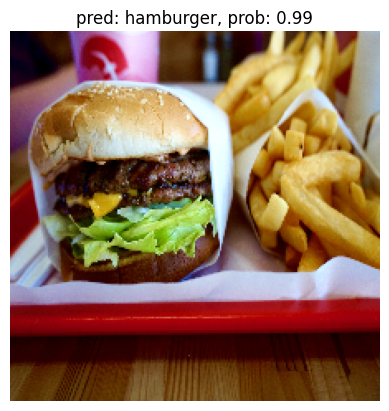

In [96]:
# Make predictions on and plot custom food images

img = load_and_prep_image(custom_food_image_filename, scale=False) # don't need to scale for our EfficientNetB0 model
pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [1, 224, 224, 3] (same shape as model was trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with the highet prediction probability
# Plot the appropriate information
plt.figure()
plt.imshow(img/225.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)

In [57]:
# #download files from colab
# from google.colab import files

# %cd /root/tensorflow_datasets/training_logs

# !zip -r efficientb0_101_classes_all_data_fine_tuning.zip efficientb0_101_classes_all_data_fine_tuning/

# files.download('efficientb0_101_classes_all_data_fine_tuning.zip')